<a href="https://colab.research.google.com/github/KennyTheBoss05/Uni-of-Leeds/blob/main/mm23ktm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage.
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```): mm23ktm



```
mm23ktm
```

--> double click to respond

Your full name: Kevin Timothy Muller

--> double click to respond

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle.

#### Submitting your test result to Kaggle leaderboard
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [1]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# always check your version
print(torch.__version__)

2.2.1+cu121


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30.

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks)


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!--
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions?
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [3]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import os
import torch.nn.functional as F
from torch.optim import Adam

In [5]:
from google.colab import files
uploaded=files.upload()

Saving comp5625m-artificial-intelligence-2024.zip to comp5625m-artificial-intelligence-2024.zip


In [6]:
!unzip -q comp5625m-artificial-intelligence-2024.zip

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [8]:
data_transform=transforms.Compose([
    transforms.ToTensor()
])

In [9]:
# Imports
import os
from PIL import Image
from torch.utils.data import Dataset
from natsort import natsorted
from torchvision import datasets, transforms

# Define your own class LoadFromFolder
class LoadFromFolder(Dataset):
    def __init__(self, main_dir, transform):

        # Set the loading directory
        self.main_dir = main_dir
        self.transform = transform

        # List all images in folder and count them
        all_imgs = os.listdir(main_dir)
        self.total_imgs = natsorted(all_imgs)

    def __len__(self):
    # Return the previously computed number of images
      return len(self.total_imgs)

    def __getitem__(self, idx):
      img_loc = os.path.join(self.main_dir, self.total_imgs[idx])

      # Use PIL for image loading
      image = Image.open(img_loc).convert("RGB")
      # Apply the transformations
      tensor_image = self.transform(image)
      return tensor_image

In [32]:
import torch.utils.data

dataset = datasets.ImageFolder('/content/train_set/train_set/train_set', transform=data_transform)
# Set the random seed for reproducibility
torch.manual_seed(0)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
# Create DataLoader for both datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

In [ ]:
print(len(train_loader))
print(len(valid_loader))

169
43


In [11]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [12]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [13]:
device = get_default_device()
device

device(type='cuda')

In [14]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [15]:
train_data_path = "/content/class.txt"
f = open(train_data_path, "r")
train_data = f.read()

train_data = 	train_data.split("\n")
new = []
count = 0
for t in train_data:
  if count >= 10:
    t = t[3:len(t)]
  else:
    t = t[2:len(t)]
  new.append(t)
  count = count + 1

new[0] = new[0][0:len(new[0])-1]
train_classes = new
train_classes
c = 0
for t in train_classes:
  print(f'Class {c} : {t}')
  c = c + 1

Class 0 : baboon
Class 1 : banana
Class 2 : bee
Class 3 : bison
Class 4 : butterfly
Class 5 : candle
Class 6 : cardigan
Class 7 : chihuahua
Class 8 : elephant
Class 9 : espresso
Class 10 : fly
Class 11 : goldfish
Class 12 : goose
Class 13 : grasshopper
Class 14 : hourglass
Class 15 : icecream
Class 16 : ipod
Class 17 : jellyfish
Class 18 : koala
Class 19 : ladybug
Class 20 : lion
Class 21 : mushroom
Class 22 : penguin
Class 23 : pig
Class 24 : pizza
Class 25 : pretzel
Class 26 : redpanda
Class 27 : refrigerator
Class 28 : sombrero
Class 29 : umbrella


Feature batch shape: torch.Size([64, 3, 64, 64])
Labels batch shape: torch.Size([64])


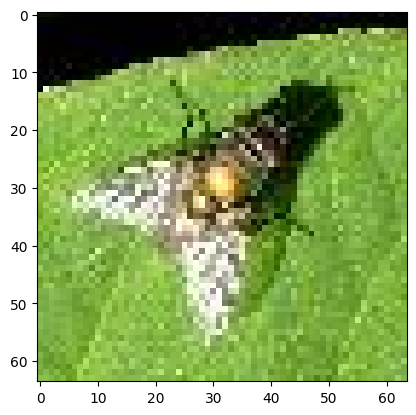

Label: fly


In [ ]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.T)
plt.show()
print(f"Label: {train_classes[label]}")

In [16]:
train_loader = DeviceDataLoader(train_loader, device)
valid_loader = DeviceDataLoader(valid_loader, device)

### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self,dropout_prob = 0.15):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(64 * 64 * 3, 4096)  # First fully connected layer with 4096 neurons
        self.dropout1 = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(4096, 1024)           # Second fully connected layer with 1024 neurons
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc3 = nn.Linear(1024, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 128)
        self.fc7 = nn.Linear(128, 30)            # Output layer with 30 neurons

        self.relu = nn.ReLU()  # Activation function

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = self.relu(self.fc1(x))  # Apply ReLU activation to the first layer
        x = self.dropout1(x)        # Apply dropout after the first layer
        x = self.relu(self.fc2(x))  # Apply ReLU activation to the second layer
        x = self.dropout2(x)        # Apply dropout after the second layer
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.dropout2(x)
        x = self.fc5(x)
        x = self.fc6(x)
        x = self.dropout2(x)
        x = self.fc7(x)             # Output layer without activation function
        return x

# Create an instance of the MLP model
model = MLP()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.00001)  # Example optimizer (Adam) with learning rate 0.0001

valid_criterion = nn.CrossEntropyLoss()

to_device(model, device);

### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2,padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2,padding=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=2,padding=1)

        # Maxpooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening
        self.flatten = nn.Flatten()

        # Fully connected layers
        self.fc1 = nn.Linear(20736, 4096)
        self.fc2 = nn.Linear(4096, 512)
        self.fc3 = nn.Linear(512, num_classes)

        # Activation function
        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv6(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Example usage:
num_classes = 30  # Example number of classes (for classification)

model = CNN(num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

# Loss function and optimizer
valid_criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

to_device(model, device);

## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [ ]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

First we train the MLP model ->

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self,dropout_prob = 0.15):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(64 * 64 * 3, 4096)  # First fully connected layer with 4096 neurons
        self.dropout1 = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(4096, 1024)           # Second fully connected layer with 1024 neurons
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc3 = nn.Linear(1024, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 128)
        self.fc7 = nn.Linear(128, 30)            # Output layer with 30 neurons

        self.relu = nn.ReLU()  # Activation function

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = self.relu(self.fc1(x))  # Apply ReLU activation to the first layer
        x = self.dropout1(x)        # Apply dropout after the first layer
        x = self.relu(self.fc2(x))  # Apply ReLU activation to the second layer
        x = self.dropout2(x)        # Apply dropout after the second layer
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.dropout2(x)
        x = self.fc5(x)
        x = self.fc6(x)
        x = self.dropout2(x)
        x = self.fc7(x)             # Output layer without activation function
        return x

# Create an instance of the MLP model
model = MLP()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.00001)  # Example optimizer (Adam) with learning rate 0.0001

valid_criterion = nn.CrossEntropyLoss()

to_device(model, device);

In [ ]:
data_transform=transforms.Compose([
    # Resize image
    transforms.Resize(size=(64,64)),
    # Flip the image randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into tensor
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
import torch.utils.data

dataset = datasets.ImageFolder('/content/train_set/train_set/train_set', transform=data_transform)
# Set the random seed for reproducibility
torch.manual_seed(0)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
# Create DataLoader for both datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
train_loader = DeviceDataLoader(train_loader, device)
valid_loader = DeviceDataLoader(valid_loader, device)

In [ ]:
import torch

def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Assuming you have defined the necessary variables model, criterion, optimizer,
# train_loader, valid_loader, and valid_criterion
num_epochs = 30  # Example number of epochs
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

# Loop over the dataset for the specified number of epochs
for epoch in range(num_epochs):
    print(f'Epoch : {epoch+1}')
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Iterate over the batches of data in the train_loader
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients of all optimized tensors
        outputs = model(inputs)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Update the model parameters based on the gradients computed during the backward pass

        # Track the running loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Print the training loss and accuracy after each epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    print(f'Training - Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    # Iterate over the batches of data in the validation_loader
    for val_inputs, val_labels in valid_loader:
        val_outputs = model(val_inputs)  # Forward pass
        val_loss = valid_criterion(val_outputs, val_labels)  # Calculate loss

        # Track the validation loss
        val_running_loss += val_loss.item()

        # Calculate accuracy
        _, val_predicted = torch.max(val_outputs, 1)
        val_total_predictions += val_labels.size(0)
        val_correct_predictions += (val_predicted == val_labels).sum().item()

    # Print the validation loss and accuracy after each epoch
    val_epoch_loss = val_running_loss / len(valid_loader)
    val_epoch_accuracy = val_correct_predictions / val_total_predictions
    print(f'Validation - Epoch [{epoch+1}/{num_epochs}], Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.4f}')

    # Append to history lists
    train_loss_history.append(epoch_loss)
    val_loss_history.append(val_epoch_loss)
    train_accuracy_history.append(epoch_accuracy)
    val_accuracy_history.append(val_epoch_accuracy)

    # Save model weights after each epoch
    torch.save(model.state_dict(), f'MLPmodel_epoch_{epoch+1}.pt')


Epoch : 1
Training - Epoch [1/30], Loss: 3.3095, Accuracy: 0.0859
Validation - Epoch [1/30], Loss: 3.2013, Accuracy: 0.1074
Epoch : 2
Training - Epoch [2/30], Loss: 3.1021, Accuracy: 0.1261
Validation - Epoch [2/30], Loss: 3.0256, Accuracy: 0.1507
Epoch : 3
Training - Epoch [3/30], Loss: 2.9586, Accuracy: 0.1584
Validation - Epoch [3/30], Loss: 2.9314, Accuracy: 0.1681
Epoch : 4
Training - Epoch [4/30], Loss: 2.8741, Accuracy: 0.1752
Validation - Epoch [4/30], Loss: 2.8749, Accuracy: 0.1881
Epoch : 5
Training - Epoch [5/30], Loss: 2.8216, Accuracy: 0.1895
Validation - Epoch [5/30], Loss: 2.8354, Accuracy: 0.1989
Epoch : 6
Training - Epoch [6/30], Loss: 2.7774, Accuracy: 0.2011
Validation - Epoch [6/30], Loss: 2.8166, Accuracy: 0.1996
Epoch : 7
Training - Epoch [7/30], Loss: 2.7375, Accuracy: 0.2111
Validation - Epoch [7/30], Loss: 2.7894, Accuracy: 0.2111
Epoch : 8
Training - Epoch [8/30], Loss: 2.7039, Accuracy: 0.2207
Validation - Epoch [8/30], Loss: 2.7748, Accuracy: 0.2137
Epoch : 

The best model is found at the 18th epoch as it has the lowest validation loss and all the validation losses in upcoming epochs are steadily increasing. This trend can be verified with the graphs below.

Validation Loss: 2.6750, Validation Accuracy: 0.2315

Graphs :

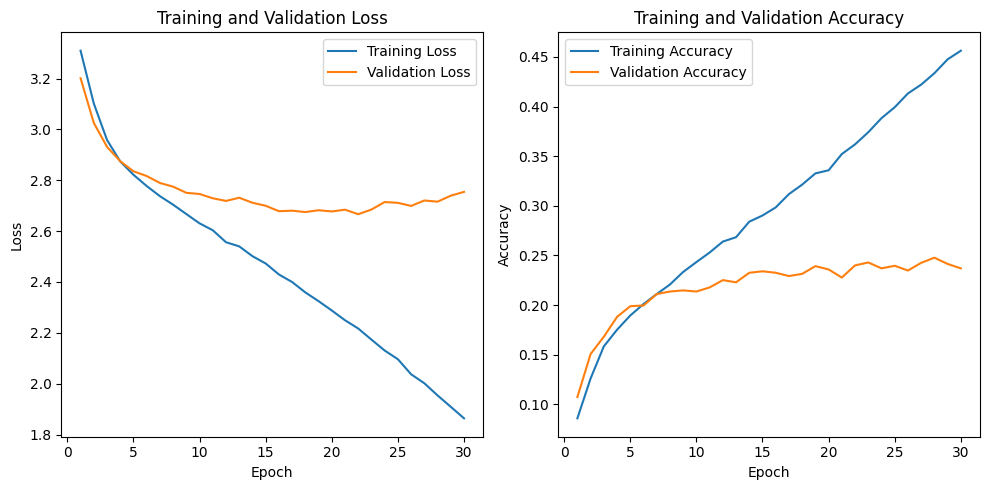

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Now, we run the CNN Model ->

For the initial iteration of the CNN model, we do not have any data augmentation, no dropout and no validation of our choice of learning rate.

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2,padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2,padding=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=2,padding=1)

        # Maxpooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening
        self.flatten = nn.Flatten()

        # Fully connected layers
        self.fc1 = nn.Linear(20736, 4096)
        self.fc2 = nn.Linear(4096, 512)
        self.fc3 = nn.Linear(512, num_classes)

        # Activation function
        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv6(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Example usage:
num_classes = 30  # Example number of classes (for classification)

model = CNN(num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

# Loss function and optimizer
valid_criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

to_device(model, device);

In [39]:
data_transform=transforms.Compose([
    transforms.ToTensor()
])

In [40]:
import torch.utils.data

dataset = datasets.ImageFolder('/content/train_set/train_set/train_set', transform=data_transform)
# Set the random seed for reproducibility
torch.manual_seed(0)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
# Create DataLoader for both datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
train_loader = DeviceDataLoader(train_loader, device)
valid_loader = DeviceDataLoader(valid_loader, device)

In [ ]:
import torch

def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Assuming you have defined the necessary variables model, criterion, optimizer,
# train_loader, valid_loader, and valid_criterion
num_epochs = 25  # Example number of epochs
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

# Loop over the dataset for the specified number of epochs
for epoch in range(num_epochs):
    print(f'Epoch : {epoch+1}')
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Iterate over the batches of data in the train_loader
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients of all optimized tensors
        outputs = model(inputs)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Update the model parameters based on the gradients computed during the backward pass

        # Track the running loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Print the training loss and accuracy after each epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    print(f'Training - Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    # Iterate over the batches of data in the validation_loader
    for val_inputs, val_labels in valid_loader:
        val_outputs = model(val_inputs)  # Forward pass
        val_loss = valid_criterion(val_outputs, val_labels)  # Calculate loss

        # Track the validation loss
        val_running_loss += val_loss.item()

        # Calculate accuracy
        _, val_predicted = torch.max(val_outputs, 1)
        val_total_predictions += val_labels.size(0)
        val_correct_predictions += (val_predicted == val_labels).sum().item()

    # Print the validation loss and accuracy after each epoch
    val_epoch_loss = val_running_loss / len(valid_loader)
    val_epoch_accuracy = val_correct_predictions / val_total_predictions
    print(f'Validation - Epoch [{epoch+1}/{num_epochs}], Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.4f}')

    # Append to history lists
    train_loss_history.append(epoch_loss)
    val_loss_history.append(val_epoch_loss)
    train_accuracy_history.append(epoch_accuracy)
    val_accuracy_history.append(val_epoch_accuracy)

    # Save model weights after each epoch
    torch.save(model.state_dict(), f'CNNmodel_epoch_{epoch+1}.pt')


Epoch : 1
Training - Epoch [1/25], Loss: 3.2846, Accuracy: 0.0639
Validation - Epoch [1/25], Loss: 3.0705, Accuracy: 0.1244
Epoch : 2
Training - Epoch [2/25], Loss: 3.0058, Accuracy: 0.1379
Validation - Epoch [2/25], Loss: 2.9512, Accuracy: 0.1496
Epoch : 3
Training - Epoch [3/25], Loss: 2.8822, Accuracy: 0.1694
Validation - Epoch [3/25], Loss: 2.8362, Accuracy: 0.1859
Epoch : 4
Training - Epoch [4/25], Loss: 2.7300, Accuracy: 0.2111
Validation - Epoch [4/25], Loss: 2.6844, Accuracy: 0.2244
Epoch : 5
Training - Epoch [5/25], Loss: 2.5709, Accuracy: 0.2517
Validation - Epoch [5/25], Loss: 2.5603, Accuracy: 0.2548
Epoch : 6
Training - Epoch [6/25], Loss: 2.3946, Accuracy: 0.2972
Validation - Epoch [6/25], Loss: 2.4278, Accuracy: 0.2937
Epoch : 7
Training - Epoch [7/25], Loss: 2.2357, Accuracy: 0.3442
Validation - Epoch [7/25], Loss: 2.3779, Accuracy: 0.3148
Epoch : 8
Training - Epoch [8/25], Loss: 2.1016, Accuracy: 0.3809
Validation - Epoch [8/25], Loss: 2.2987, Accuracy: 0.3426
Epoch : 

At the 12th epoch, the validation loss his its lowest value and future values significantly increase. Hence, this epoch is chosen as the best final model.

Model Validation Loss: 2.2623, Accuracy: 0.3719

Graphs :

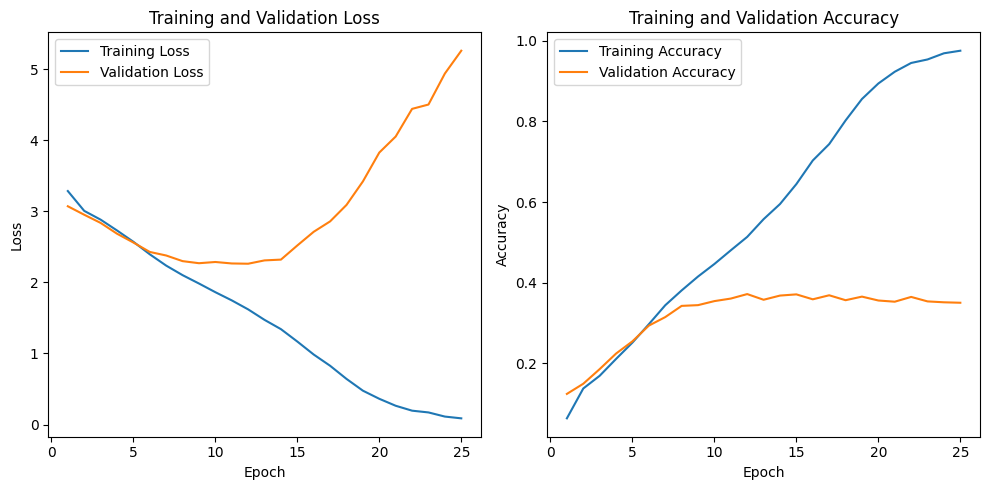

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

Overall, the CNN model seems to perform a lot better than the MLP model. This makes sense due to the additional convolutional layers present in the CNN which is not present in the MLP model.

Number of parameters in MLP : ((64 * 64 * 3 + 1) * 4096) + ((4096 + 1) * 1024) + ((1024 + 1) * 256) + ((256 + 1) * 256) + ((256 + 1) * 128) + ((128 + 1) * 128) + ((128 + 1) * 30) = 54912542

Number of parameters in CNN : ((3 * 2 * 2 + 1) * 32) + ((32 * 2 * 2 + 1) * 64) + ((64 * 2 * 2 + 1) * 128) + ((128 * 2 * 2 + 1) * 256) + ((128 * 2 * 2 + 1) * 128) + ((256 * 2 * 2 + 1) * 256) + ((20736 + 1) * 4096) + ((4096 + 1) * 512) + ((512 + 1) * 30) = 87552766

One should always prefer CNN over MLP for tasks involving image data due to it's ability to capture spatial dependencies and learn hierarchical representations effectively.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

Confusion Matrix :

In [29]:
# Assuming you've defined your CNN model class as CNN and you want to load the saved model back
model_path = "/content/CNNmodel_epoch_12.pt"
modelCNNnew = CNN(30)  # Create an instance of your CNN model
modelCNNnew.load_state_dict(torch.load(model_path))  # Load the saved state dictionary into the model
to_device(modelCNNnew, device);
modelCNNnew.eval()  # Set the model to evaluation mode

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=20736, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=30, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

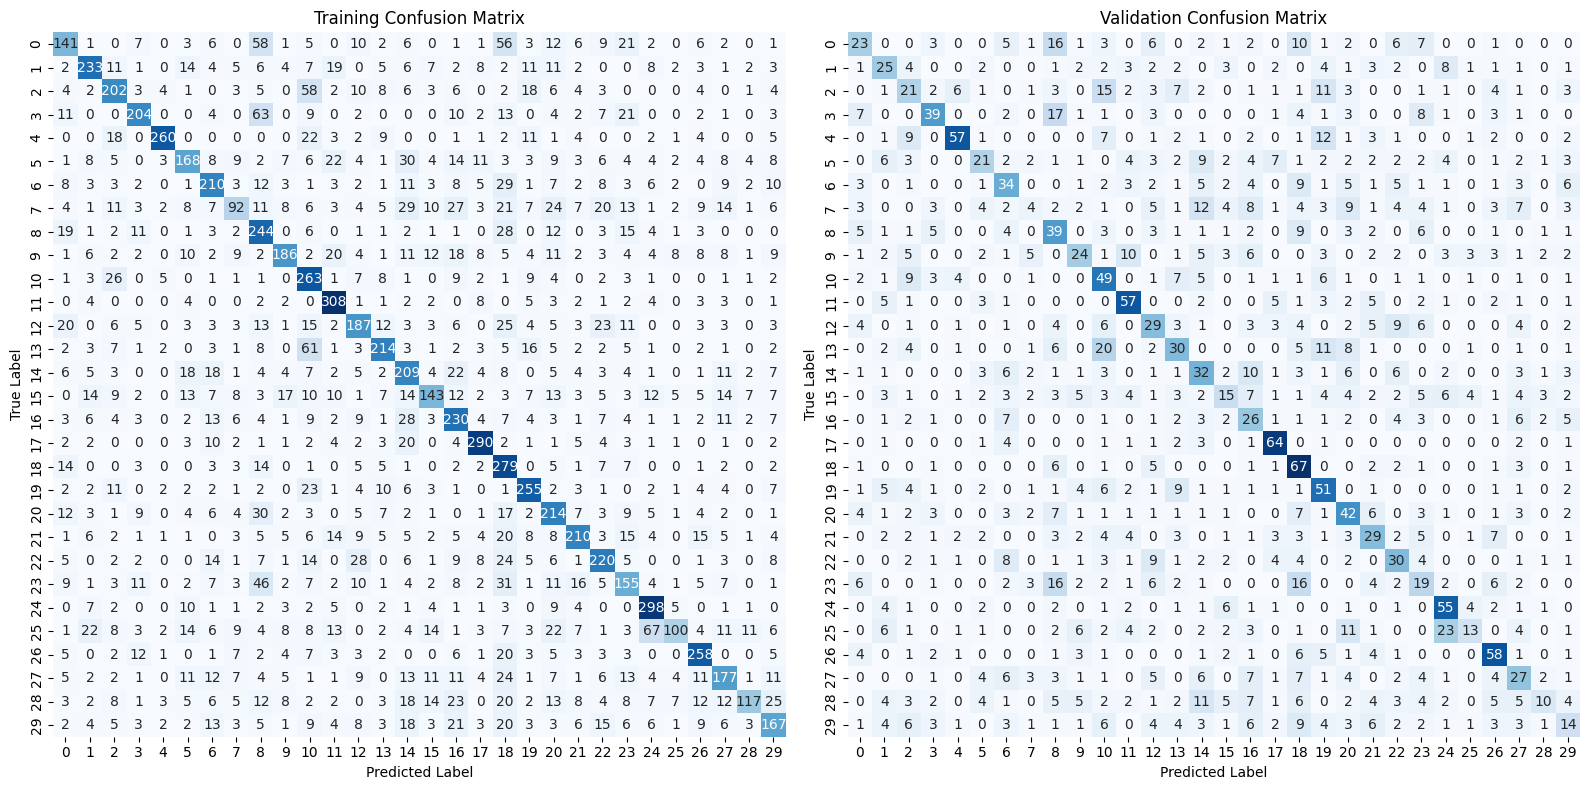

In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate confusion matrix
def generate_confusion_matrix(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    # Iterate over the batches of data
    for inputs, labels in data_loader:
        outputs = model(inputs)  # Forward pass
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.tolist())
        all_predictions.extend(predicted.tolist())

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    return cm

# Generate confusion matrix for training set
train_confusion_matrix = generate_confusion_matrix(modelCNNnew, train_loader)

# Generate confusion matrix for validation set
val_confusion_matrix = generate_confusion_matrix(modelCNNnew, valid_loader)

# Plotting confusion matrices
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


In [ ]:
c = 0 #To help understand the confusion matrix
for t in train_classes:
  print(f'Class {c} : {t}')
  c = c + 1

Class 0 : baboon
Class 1 : banana
Class 2 : bee
Class 3 : bison
Class 4 : butterfly
Class 5 : candle
Class 6 : cardigan
Class 7 : chihuahua
Class 8 : elephant
Class 9 : espresso
Class 10 : fly
Class 11 : goldfish
Class 12 : goose
Class 13 : grasshopper
Class 14 : hourglass
Class 15 : icecream
Class 16 : ipod
Class 17 : jellyfish
Class 18 : koala
Class 19 : ladybug
Class 20 : lion
Class 21 : mushroom
Class 22 : penguin
Class 23 : pig
Class 24 : pizza
Class 25 : pretzel
Class 26 : redpanda
Class 27 : refrigerator
Class 28 : sombrero
Class 29 : umbrella


ROC Curves :

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2,padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2,padding=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=2,padding=1)

        # Maxpooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening
        self.flatten = nn.Flatten()

        # Fully connected layers
        self.fc1 = nn.Linear(20736, 4096)
        self.fc2 = nn.Linear(4096, 512)
        self.fc3 = nn.Linear(512, num_classes)

        # Activation function
        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv6(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Example usage:
num_classes = 30  # Example number of classes (for classification)

nmodel = CNN(num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

# Loss function and optimizer
valid_criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

#to_device(model, device);

In [ ]:
import torch.utils.data

dataset = datasets.ImageFolder('/content/train_set/train_set/train_set', transform=data_transform)
# Set the random seed for reproducibility
torch.manual_seed(0)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
# Create DataLoader for both datasets
ntrain_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
nvalid_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

Epoch : 1
Training - Epoch [1/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 2
Training - Epoch [2/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 3
Training - Epoch [3/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 4
Training - Epoch [4/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 5
Training - Epoch [5/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 6
Training - Epoch [6/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 7
Training - Epoch [7/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 8
Training - Epoch [8/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 9
Training - Epoch [9/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 10
Training - Epoch [10/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 11
Training - Epoch [11/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 12
Training - Epoch [12/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 13
Training - Epoch [13/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 14
Training - Epoch [14/25], Loss: 3.4017, Accuracy: 0.0328
Epoch : 15
Training - Epoch [15/25], Loss: 3.4017, Accuracy: 0.032

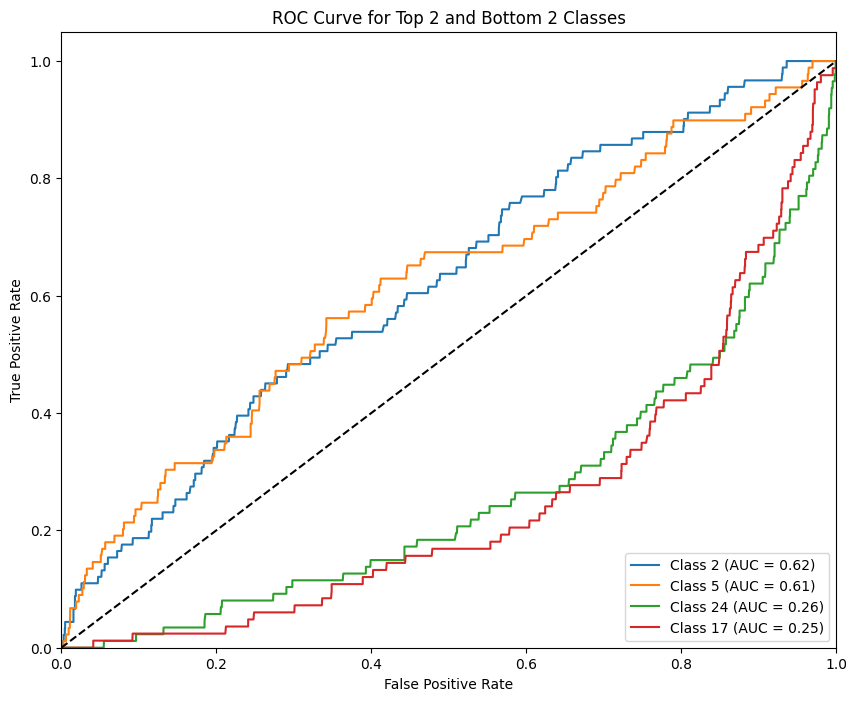

In [42]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Assuming you have defined the necessary variables model, criterion, optimizer,
# train_loader, valid_loader, and valid_criterion
num_epochs = 25  # Example number of epochs
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

# Define empty lists to store true labels and predicted probabilities for validation set
y_true_val = []
y_probs_val = []

# Loop over the dataset for the specified number of epochs
for epoch in range(num_epochs):
    print(f'Epoch : {epoch+1}')
    nmodel.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Iterate over the batches of data in the train_loader
    for inputs, labels in ntrain_loader:
        optimizer.zero_grad()  # Clear the gradients of all optimized tensors
        outputs = nmodel(inputs)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Update the model parameters based on the gradients computed during the backward pass

        # Track the running loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Print the training loss and accuracy after each epoch
    epoch_loss = running_loss / len(ntrain_loader)
    epoch_accuracy = correct_predictions / total_predictions
    print(f'Training - Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

    # Validation
    nmodel.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    # Iterate over the batches of data in the validation_loader
for val_inputs, val_labels in nvalid_loader:
    val_outputs = nmodel(val_inputs)  # Forward pass
    val_loss = valid_criterion(val_outputs, val_labels)  # Calculate loss

    # Calculate class probabilities using softmax
    probabilities = torch.softmax(val_outputs, dim=1)

    # Append true labels and predicted probabilities
    y_true_val.extend(val_labels.numpy())
    y_probs_val.extend(probabilities.detach().numpy())  # Detach the tensor before converting to numpy array

    # Track the validation loss
    val_running_loss += val_loss.item()

    # Calculate accuracy
    _, val_predicted = torch.max(val_outputs, 1)
    val_total_predictions += val_labels.size(0)
    val_correct_predictions += (val_predicted == val_labels).sum().item()

    # Print the validation loss and accuracy after each epoch
    val_epoch_loss = val_running_loss / len(nvalid_loader)
    val_epoch_accuracy = val_correct_predictions / val_total_predictions
    print(f'Validation - Epoch [{epoch+1}/{num_epochs}], Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.4f}')

    # Append to history lists
    train_loss_history.append(epoch_loss)
    val_loss_history.append(val_epoch_loss)
    train_accuracy_history.append(epoch_accuracy)
    val_accuracy_history.append(val_epoch_accuracy)

    # Save model weights after each epoch
    torch.save(model.state_dict(), f'CNNmodel_epoch_{epoch+1}.pt')

# Convert lists to numpy arrays
y_true_val = np.array(y_true_val)
y_probs_val = np.array(y_probs_val)

# Convert class labels to a binary format
y_bin_val = label_binarize(y_true_val, classes=np.unique(y_true_val))
n_classes = y_bin_val.shape[1]

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin_val[:, i], y_probs_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort classes by AUC
sorted_classes_by_auc = sorted(range(n_classes), key=lambda i: roc_auc[i], reverse=True)
top_two_classes = sorted_classes_by_auc[:2]  # top
bottom_two_classes = sorted_classes_by_auc[-2:]  # bottom

# Plot ROC curves for top 2 and bottom 2 classes
plt.figure(figsize=(10, 8))
for i in top_two_classes + bottom_two_classes:
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Top 2 and Bottom 2 Classes')
plt.legend(loc='lower right')
plt.show()


### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish.

In [ ]:
# Your code here (optional)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``.
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations.

> Provide graphs and comment on what you observe.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2,padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2,padding=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=2,padding=1)

        # Maxpooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening
        self.flatten = nn.Flatten()

        # Fully connected layers
        self.fc1 = nn.Linear(20736, 4096)
        self.fc2 = nn.Linear(4096, 512)
        self.fc3 = nn.Linear(512, num_classes)

        # Activation function
        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv6(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Example usage:
num_classes = 30  # Example number of classes (for classification)

model = CNN(num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

# Loss function and optimizer
valid_criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

to_device(model, device);

In [ ]:
data_transform=transforms.Compose([
    # Resize image
    transforms.Resize(size=(64,64)),
    # Flip the image randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into tensor
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
])

In [ ]:
import torch.utils.data
#from sklearn.model_selection import train_test_split

dataset = datasets.ImageFolder('/content/train_set/train_set/train_set', transform=data_transform)
# Set the random seed for reproducibility
torch.manual_seed(0)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
#train_dataset, val_dataset = train_test_split(dataset,stratify = dataset,test_size = 0.2)
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
# Create DataLoader for both datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
train_loader = DeviceDataLoader(train_loader, device)
valid_loader = DeviceDataLoader(valid_loader, device)

In [ ]:
import torch

def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Assuming you have defined the necessary variables model, criterion, optimizer,
# train_loader, valid_loader, and valid_criterion
num_epochs = 25  # Example number of epochs
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

# Loop over the dataset for the specified number of epochs
for epoch in range(num_epochs):
    print(f'Epoch : {epoch+1}')
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Iterate over the batches of data in the train_loader
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients of all optimized tensors
        outputs = model(inputs)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Update the model parameters based on the gradients computed during the backward pass

        # Track the running loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Print the training loss and accuracy after each epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    print(f'Training - Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    # Iterate over the batches of data in the validation_loader
    for val_inputs, val_labels in valid_loader:
        val_outputs = model(val_inputs)  # Forward pass
        val_loss = valid_criterion(val_outputs, val_labels)  # Calculate loss

        # Track the validation loss
        val_running_loss += val_loss.item()

        # Calculate accuracy
        _, val_predicted = torch.max(val_outputs, 1)
        val_total_predictions += val_labels.size(0)
        val_correct_predictions += (val_predicted == val_labels).sum().item()

    # Print the validation loss and accuracy after each epoch
    val_epoch_loss = val_running_loss / len(valid_loader)
    val_epoch_accuracy = val_correct_predictions / val_total_predictions
    print(f'Validation - Epoch [{epoch+1}/{num_epochs}], Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.4f}')

    # Append to history lists
    train_loss_history.append(epoch_loss)
    val_loss_history.append(val_epoch_loss)
    train_accuracy_history.append(epoch_accuracy)
    val_accuracy_history.append(val_epoch_accuracy)

    # Save model weights after each epoch
    torch.save(model.state_dict(), f'CNNmodel_withaug_epoch_{epoch+1}.pt')


Epoch : 1
Training - Epoch [1/25], Loss: 3.3068, Accuracy: 0.0695
Validation - Epoch [1/25], Loss: 3.1389, Accuracy: 0.1126
Epoch : 2
Training - Epoch [2/25], Loss: 3.0840, Accuracy: 0.1337
Validation - Epoch [2/25], Loss: 3.0666, Accuracy: 0.1307
Epoch : 3
Training - Epoch [3/25], Loss: 2.9862, Accuracy: 0.1568
Validation - Epoch [3/25], Loss: 2.9400, Accuracy: 0.1674
Epoch : 4
Training - Epoch [4/25], Loss: 2.8445, Accuracy: 0.1907
Validation - Epoch [4/25], Loss: 2.7695, Accuracy: 0.2078
Epoch : 5
Training - Epoch [5/25], Loss: 2.6636, Accuracy: 0.2385
Validation - Epoch [5/25], Loss: 2.6761, Accuracy: 0.2315
Epoch : 6
Training - Epoch [6/25], Loss: 2.5600, Accuracy: 0.2588
Validation - Epoch [6/25], Loss: 2.6217, Accuracy: 0.2500
Epoch : 7
Training - Epoch [7/25], Loss: 2.4621, Accuracy: 0.2875
Validation - Epoch [7/25], Loss: 2.5314, Accuracy: 0.2626
Epoch : 8
Training - Epoch [8/25], Loss: 2.3793, Accuracy: 0.3056
Validation - Epoch [8/25], Loss: 2.5296, Accuracy: 0.2811
Epoch : 

We notice that with the transformations applied, the model has lost a validation accuracy of about 6 percent. This means that the transformations were too harsh or not necessary for this dataset.

It might be advantageous to maybe leave out a few of these transformation layers before we dive into further processing. (ColorJitter)

Graphs :

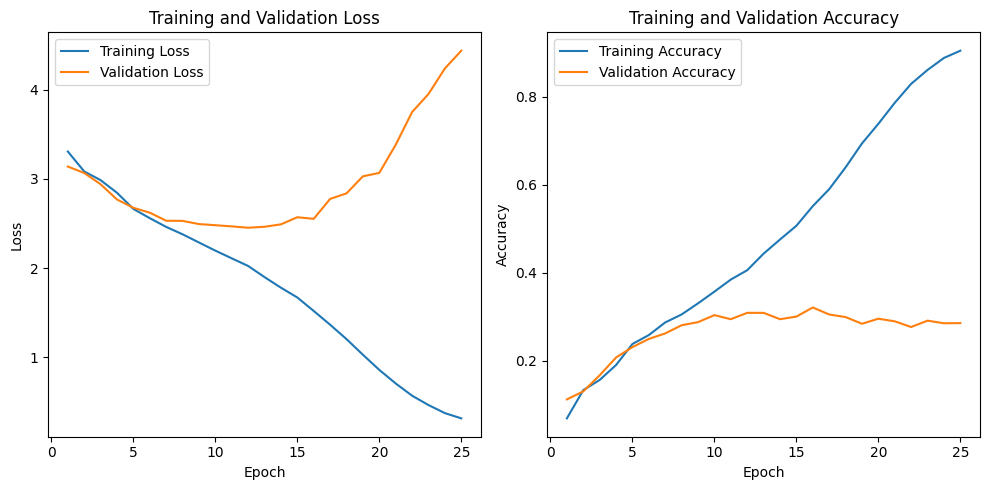

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model

> Provide graphs and comment on your choice of proportion used.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2,padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2,padding=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=2,padding=1)

        # Maxpooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening
        self.flatten = nn.Flatten()

        # Fully connected layers
        self.fc1 = nn.Linear(20736, 4096)
        self.fc2 = nn.Linear(4096, 512)
        self.fc3 = nn.Linear(512, num_classes)

        # Activation function
        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv6(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.dropout(x)
        return x

# Example usage:
num_classes = 30  # Example number of classes (for classification)

model = CNN(num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

# Loss function and optimizer
valid_criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

to_device(model, device);


In [ ]:
import torch

def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Assuming you have defined the necessary variables model, criterion, optimizer,
# train_loader, valid_loader, and valid_criterion
num_epochs = 25  # Example number of epochs
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

# Loop over the dataset for the specified number of epochs
for epoch in range(num_epochs):
    print(f'Epoch : {epoch+1}')
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Iterate over the batches of data in the train_loader
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients of all optimized tensors
        outputs = model(inputs)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Update the model parameters based on the gradients computed during the backward pass

        # Track the running loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Print the training loss and accuracy after each epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    print(f'Training - Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    # Iterate over the batches of data in the validation_loader
    for val_inputs, val_labels in valid_loader:
        val_outputs = model(val_inputs)  # Forward pass
        val_loss = valid_criterion(val_outputs, val_labels)  # Calculate loss

        # Track the validation loss
        val_running_loss += val_loss.item()

        # Calculate accuracy
        _, val_predicted = torch.max(val_outputs, 1)
        val_total_predictions += val_labels.size(0)
        val_correct_predictions += (val_predicted == val_labels).sum().item()

    # Print the validation loss and accuracy after each epoch
    val_epoch_loss = val_running_loss / len(valid_loader)
    val_epoch_accuracy = val_correct_predictions / val_total_predictions
    print(f'Validation - Epoch [{epoch+1}/{num_epochs}], Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.4f}')

    # Append to history lists
    train_loss_history.append(epoch_loss)
    val_loss_history.append(val_epoch_loss)
    train_accuracy_history.append(epoch_accuracy)
    val_accuracy_history.append(val_epoch_accuracy)

    # Save model weights after each epoch
    torch.save(model.state_dict(), f'CNNmodel_withauganddrop_epoch_{epoch+1}.pt')


Epoch : 1
Training - Epoch [1/25], Loss: 3.3713, Accuracy: 0.0535
Validation - Epoch [1/25], Loss: 3.2382, Accuracy: 0.0907
Epoch : 2
Training - Epoch [2/25], Loss: 3.1971, Accuracy: 0.1021
Validation - Epoch [2/25], Loss: 3.0885, Accuracy: 0.1248
Epoch : 3
Training - Epoch [3/25], Loss: 3.0869, Accuracy: 0.1373
Validation - Epoch [3/25], Loss: 2.9370, Accuracy: 0.1707
Epoch : 4
Training - Epoch [4/25], Loss: 2.9809, Accuracy: 0.1650
Validation - Epoch [4/25], Loss: 2.8493, Accuracy: 0.1907
Epoch : 5
Training - Epoch [5/25], Loss: 2.8909, Accuracy: 0.1914
Validation - Epoch [5/25], Loss: 2.8236, Accuracy: 0.1970
Epoch : 6
Training - Epoch [6/25], Loss: 2.8114, Accuracy: 0.2131
Validation - Epoch [6/25], Loss: 2.6681, Accuracy: 0.2404
Epoch : 7
Training - Epoch [7/25], Loss: 2.7404, Accuracy: 0.2311
Validation - Epoch [7/25], Loss: 2.6704, Accuracy: 0.2389
Epoch : 8
Training - Epoch [8/25], Loss: 2.6769, Accuracy: 0.2494
Validation - Epoch [8/25], Loss: 2.5999, Accuracy: 0.2674
Epoch : 

Upon applying dropouts with a probability of 0.2, we get a validation accuracy score of 33.19 in the 15th epoch!

The reason for the choice of probability = 0.2 is due to the the small size of the image, it is difficult for the model to extract useful features. Moreover, the CNN model used has 3 fully connected layers, so a high dropout will result in too many features being lost as the dropout occurs three times.

The value of 0.2 is perfect in being not too large to remove too many features but also not too small as to be too insignificant!

Graphs :

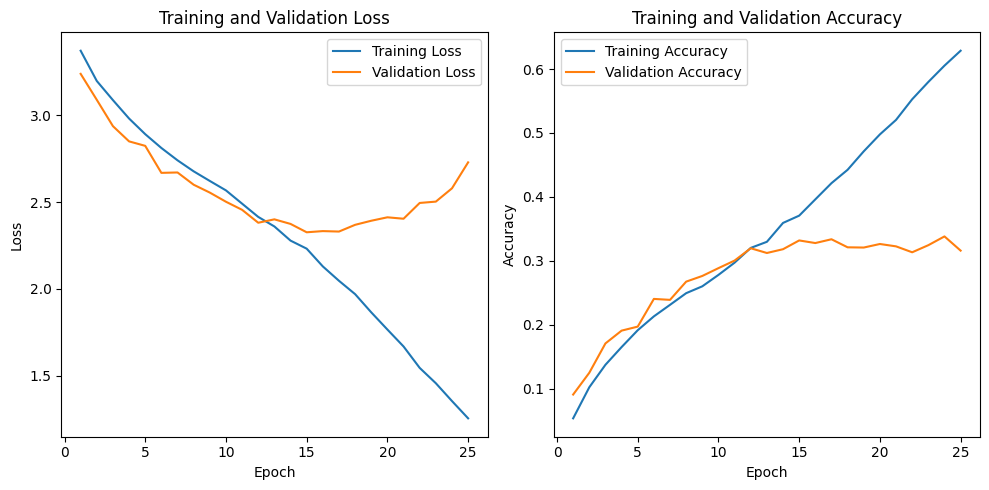

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

Learning rate = 0.1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2,padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2,padding=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=2,padding=1)

        # Maxpooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening
        self.flatten = nn.Flatten()

        # Fully connected layers
        self.fc1 = nn.Linear(20736, 4096)
        self.fc2 = nn.Linear(4096, 512)
        self.fc3 = nn.Linear(512, num_classes)

        # Activation function
        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv6(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.dropout(x)
        return x

# Example usage:
num_classes = 30  # Example number of classes (for classification)

model = CNN(num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.1)  # Example optimizer (Adam) with learning rate 0.0001

# Loss function and optimizer
valid_criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.1)  # Example optimizer (Adam) with learning rate 0.0001

to_device(model, device);


In [ ]:
import torch

def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy


# Assuming you have defined the necessary variables model, criterion, optimizer,
# train_loader, valid_loader, and valid_criterion
num_epochs = 25  # Example number of epochs
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

# Loop over the dataset for the specified number of epochs
for epoch in range(num_epochs):
    print(f'Epoch : {epoch+1}')
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Iterate over the batches of data in the train_loader
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients of all optimized tensors
        outputs = model(inputs)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Update the model parameters based on the gradients computed during the backward pass

        # Track the running loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Print the training loss and accuracy after each epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    print(f'Training - Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    # Iterate over the batches of data in the validation_loader
    for val_inputs, val_labels in valid_loader:
        val_outputs = model(val_inputs)  # Forward pass
        val_loss = valid_criterion(val_outputs, val_labels)  # Calculate loss

        # Track the validation loss
        val_running_loss += val_loss.item()

        # Calculate accuracy
        _, val_predicted = torch.max(val_outputs, 1)
        val_total_predictions += val_labels.size(0)
        val_correct_predictions += (val_predicted == val_labels).sum().item()

    # Print the validation loss and accuracy after each epoch
    val_epoch_loss = val_running_loss / len(valid_loader)
    val_epoch_accuracy = val_correct_predictions / val_total_predictions
    print(f'Validation - Epoch [{epoch+1}/{num_epochs}], Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.4f}')

    # Append to history lists
    train_loss_history.append(epoch_loss)
    val_loss_history.append(val_epoch_loss)
    train_accuracy_history.append(epoch_accuracy)
    val_accuracy_history.append(val_epoch_accuracy)

    # Save model weights after each epoch
    torch.save(model.state_dict(), f'CNNmodel_lr0.1_epoch_{epoch+1}.pt')


Epoch : 1
Training - Epoch [1/25], Loss: 146576388.9725, Accuracy: 0.0304
Validation - Epoch [1/25], Loss: 3.4121, Accuracy: 0.0370
Epoch : 2
Training - Epoch [2/25], Loss: 3.4143, Accuracy: 0.0348
Validation - Epoch [2/25], Loss: 3.4148, Accuracy: 0.0341
Epoch : 3
Training - Epoch [3/25], Loss: 3.4157, Accuracy: 0.0319
Validation - Epoch [3/25], Loss: 3.4068, Accuracy: 0.0348
Epoch : 4
Training - Epoch [4/25], Loss: 3.4176, Accuracy: 0.0310
Validation - Epoch [4/25], Loss: 3.4165, Accuracy: 0.0322
Epoch : 5
Training - Epoch [5/25], Loss: 3.4181, Accuracy: 0.0333
Validation - Epoch [5/25], Loss: 3.4153, Accuracy: 0.0341
Epoch : 6
Training - Epoch [6/25], Loss: 3.4172, Accuracy: 0.0314
Validation - Epoch [6/25], Loss: 3.4127, Accuracy: 0.0348
Epoch : 7
Training - Epoch [7/25], Loss: 3.4181, Accuracy: 0.0325
Validation - Epoch [7/25], Loss: 3.4135, Accuracy: 0.0359
Epoch : 8
Training - Epoch [8/25], Loss: 3.4174, Accuracy: 0.0331
Validation - Epoch [8/25], Loss: 3.4186, Accuracy: 0.0307


All the epochs are very bad. The model is trying to learn too many features too quickly!

Graphs :

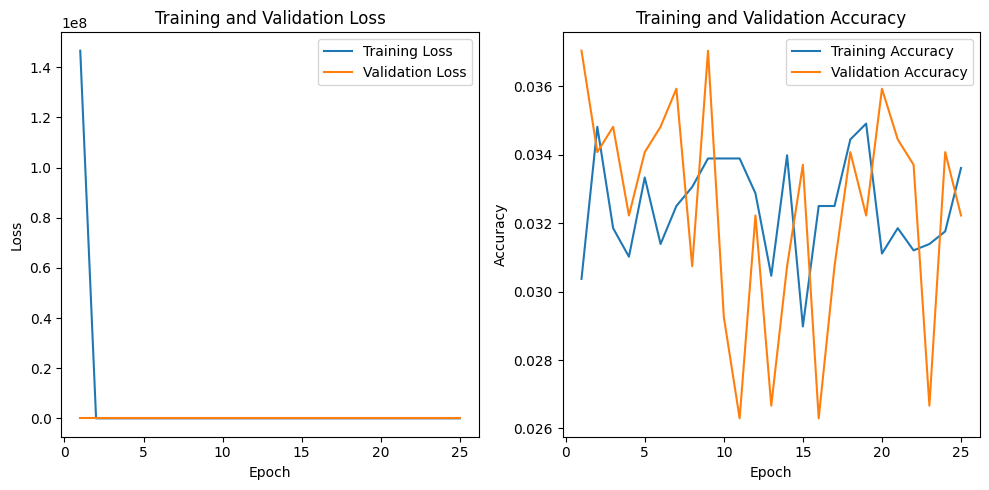

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Learning rate = 0.001

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2,padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2,padding=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=2,padding=1)

        # Maxpooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening
        self.flatten = nn.Flatten()

        # Fully connected layers
        self.fc1 = nn.Linear(20736, 4096)
        self.fc2 = nn.Linear(4096, 512)
        self.fc3 = nn.Linear(512, num_classes)

        # Activation function
        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv6(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.dropout(x)
        return x

# Example usage:
num_classes = 30  # Example number of classes (for classification)

model = CNN(num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Example optimizer (Adam) with learning rate 0.0001

# Loss function and optimizer
valid_criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Example optimizer (Adam) with learning rate 0.0001

to_device(model, device);


In [ ]:
import torch

def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Assuming you have defined the necessary variables model, criterion, optimizer,
# train_loader, valid_loader, and valid_criterion
num_epochs = 25  # Example number of epochs
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

# Loop over the dataset for the specified number of epochs
for epoch in range(num_epochs):
    print(f'Epoch : {epoch+1}')
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Iterate over the batches of data in the train_loader
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients of all optimized tensors
        outputs = model(inputs)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Update the model parameters based on the gradients computed during the backward pass

        # Track the running loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Print the training loss and accuracy after each epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    print(f'Training - Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    # Iterate over the batches of data in the validation_loader
    for val_inputs, val_labels in valid_loader:
        val_outputs = model(val_inputs)  # Forward pass
        val_loss = valid_criterion(val_outputs, val_labels)  # Calculate loss

        # Track the validation loss
        val_running_loss += val_loss.item()

        # Calculate accuracy
        _, val_predicted = torch.max(val_outputs, 1)
        val_total_predictions += val_labels.size(0)
        val_correct_predictions += (val_predicted == val_labels).sum().item()

    # Print the validation loss and accuracy after each epoch
    val_epoch_loss = val_running_loss / len(valid_loader)
    val_epoch_accuracy = val_correct_predictions / val_total_predictions
    print(f'Validation - Epoch [{epoch+1}/{num_epochs}], Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.4f}')

    # Append to history lists
    train_loss_history.append(epoch_loss)
    val_loss_history.append(val_epoch_loss)
    train_accuracy_history.append(epoch_accuracy)
    val_accuracy_history.append(val_epoch_accuracy)

    # Save model weights after each epoch
    torch.save(model.state_dict(), f'CNNmodel_lr0.001_epoch_{epoch+1}.pt')


Epoch : 1
Training - Epoch [1/25], Loss: 3.3461, Accuracy: 0.0497
Validation - Epoch [1/25], Loss: 3.1730, Accuracy: 0.0759
Epoch : 2
Training - Epoch [2/25], Loss: 3.1800, Accuracy: 0.0899
Validation - Epoch [2/25], Loss: 3.0552, Accuracy: 0.1041
Epoch : 3
Training - Epoch [3/25], Loss: 3.0803, Accuracy: 0.1244
Validation - Epoch [3/25], Loss: 2.9478, Accuracy: 0.1396
Epoch : 4
Training - Epoch [4/25], Loss: 2.9247, Accuracy: 0.1676
Validation - Epoch [4/25], Loss: 2.7167, Accuracy: 0.2133
Epoch : 5
Training - Epoch [5/25], Loss: 2.7548, Accuracy: 0.2129
Validation - Epoch [5/25], Loss: 2.5461, Accuracy: 0.2589
Epoch : 6
Training - Epoch [6/25], Loss: 2.6213, Accuracy: 0.2497
Validation - Epoch [6/25], Loss: 2.4614, Accuracy: 0.2785
Epoch : 7
Training - Epoch [7/25], Loss: 2.5029, Accuracy: 0.2869
Validation - Epoch [7/25], Loss: 2.3189, Accuracy: 0.3211
Epoch : 8
Training - Epoch [8/25], Loss: 2.3943, Accuracy: 0.3121
Validation - Epoch [8/25], Loss: 2.2315, Accuracy: 0.3426
Epoch : 

Best epoch is 13th. Validation Accuracy of 40.78 percent.

Graphs :

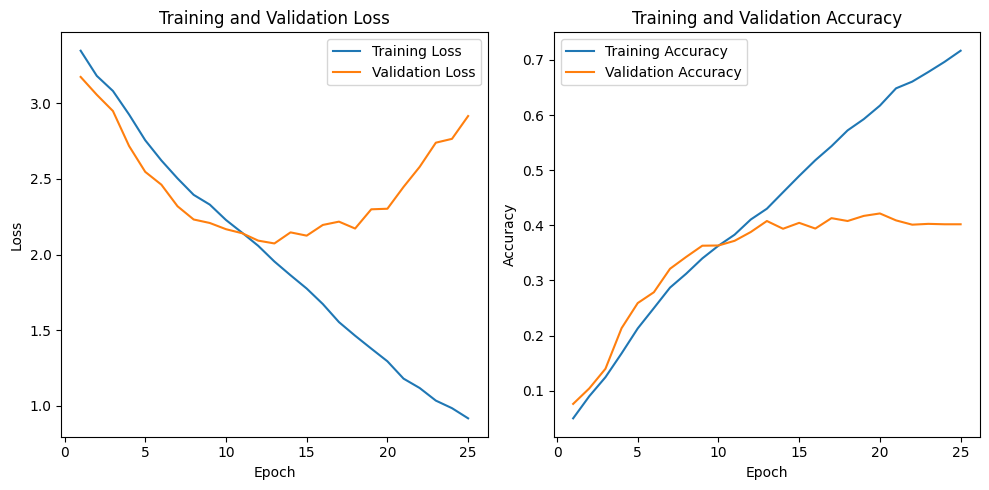

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Learning rate = 0.0001

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2,padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2,padding=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=2,padding=1)

        # Maxpooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening
        self.flatten = nn.Flatten()

        # Fully connected layers
        self.fc1 = nn.Linear(20736, 4096)
        self.fc2 = nn.Linear(4096, 512)
        self.fc3 = nn.Linear(512, num_classes)

        # Activation function
        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv6(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.dropout(x)
        return x

# Example usage:
num_classes = 30  # Example number of classes (for classification)

model = CNN(num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

# Loss function and optimizer
valid_criterion = nn.CrossEntropyLoss()  # Example loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Example optimizer (Adam) with learning rate 0.0001

to_device(model, device);


In [ ]:
import torch

def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Assuming you have defined the necessary variables model, criterion, optimizer,
# train_loader, valid_loader, and valid_criterion
num_epochs = 25  # Example number of epochs
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

# Loop over the dataset for the specified number of epochs
for epoch in range(num_epochs):
    print(f'Epoch : {epoch+1}')
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Iterate over the batches of data in the train_loader
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients of all optimized tensors
        outputs = model(inputs)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Update the model parameters based on the gradients computed during the backward pass

        # Track the running loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Print the training loss and accuracy after each epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    print(f'Training - Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    # Iterate over the batches of data in the validation_loader
    for val_inputs, val_labels in valid_loader:
        val_outputs = model(val_inputs)  # Forward pass
        val_loss = valid_criterion(val_outputs, val_labels)  # Calculate loss

        # Track the validation loss
        val_running_loss += val_loss.item()

        # Calculate accuracy
        _, val_predicted = torch.max(val_outputs, 1)
        val_total_predictions += val_labels.size(0)
        val_correct_predictions += (val_predicted == val_labels).sum().item()

    # Print the validation loss and accuracy after each epoch
    val_epoch_loss = val_running_loss / len(valid_loader)
    val_epoch_accuracy = val_correct_predictions / val_total_predictions
    print(f'Validation - Epoch [{epoch+1}/{num_epochs}], Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.4f}')

    # Append to history lists
    train_loss_history.append(epoch_loss)
    val_loss_history.append(val_epoch_loss)
    train_accuracy_history.append(epoch_accuracy)
    val_accuracy_history.append(val_epoch_accuracy)

    # Save model weights after each epoch
    torch.save(model.state_dict(), f'CNNmodel_lr0.0001_epoch_{epoch+1}.pt')


Epoch : 1
Training - Epoch [1/25], Loss: 3.2994, Accuracy: 0.0685
Validation - Epoch [1/25], Loss: 3.0506, Accuracy: 0.1304
Epoch : 2
Training - Epoch [2/25], Loss: 3.0290, Accuracy: 0.1463
Validation - Epoch [2/25], Loss: 2.8421, Accuracy: 0.1878
Epoch : 3
Training - Epoch [3/25], Loss: 2.8568, Accuracy: 0.1944
Validation - Epoch [3/25], Loss: 2.5951, Accuracy: 0.2630
Epoch : 4
Training - Epoch [4/25], Loss: 2.6478, Accuracy: 0.2555
Validation - Epoch [4/25], Loss: 2.4398, Accuracy: 0.2970
Epoch : 5
Training - Epoch [5/25], Loss: 2.5009, Accuracy: 0.2944
Validation - Epoch [5/25], Loss: 2.3215, Accuracy: 0.3374
Epoch : 6
Training - Epoch [6/25], Loss: 2.3937, Accuracy: 0.3211
Validation - Epoch [6/25], Loss: 2.2102, Accuracy: 0.3544
Epoch : 7
Training - Epoch [7/25], Loss: 2.3106, Accuracy: 0.3467
Validation - Epoch [7/25], Loss: 2.1944, Accuracy: 0.3619
Epoch : 8
Training - Epoch [8/25], Loss: 2.2101, Accuracy: 0.3772
Validation - Epoch [8/25], Loss: 2.0885, Accuracy: 0.3952
Epoch : 

The 17th epoch is the epoch with the least validation loss after which a steady increase is observed. A validation accuracy of 45.07 is observed making this the best model out of all the models.

This model will be used for testing.

Graphs :

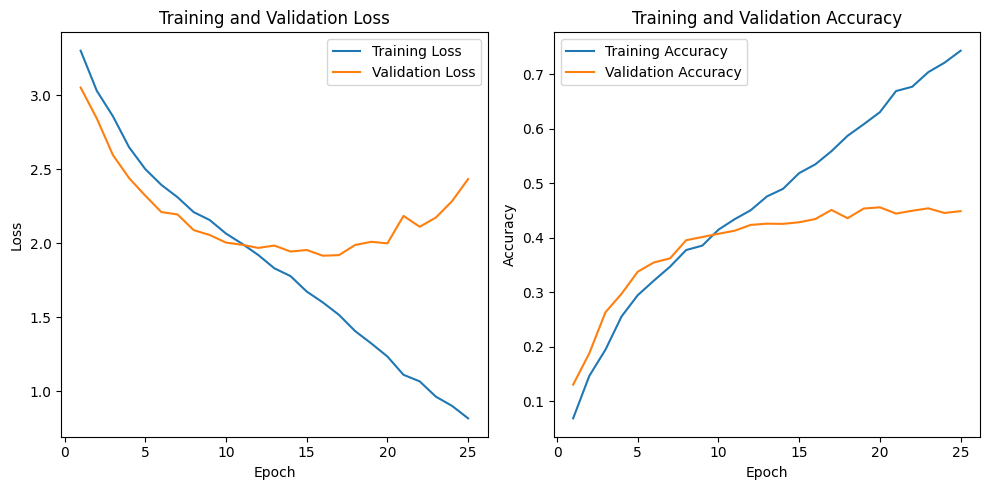

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set.

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [ ]:
test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
])

test_directory = "/content/test_set/test_set"  # Update with your test images directory
test_dataset = datasets.ImageFolder(test_directory, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
import torch
import csv

model=CNN(30)
model.load_state_dict(torch.load('/content/drive/MyDrive/Deep Learning/CNNmodel_lr0.0001_epoch_17.pt'))
model.eval()


# Placeholder for predictions
predictions = []

# No need to compute gradients
with torch.no_grad():
    for images, image_names in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Collecting predictions and their corresponding image names
        predictions.extend(zip(image_names, predicted.numpy()))


#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks].


In [ ]:
# Writing predictions to a CSV file
with open('mm23ktm.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Id', 'Category'])
    for image_name, pred in predictions:
        writer.writerow([image_name, pred])


### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation)

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Load a pre-trained AlexNet Model
alexnet_pretrained = models.alexnet(pretrained=True)

# Modify the final fully connected layer
alexnet_pretrained.classifier[6] = nn.Linear(4096, 10)  # from 4096 features to 10 classes

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_pretrained.parameters(), lr=0.001)

# For recording loss and accuracy
train_losses_unfrozen = []
train_accuracies_unfrozen = []

# Training
num_epochs = 2
for epoch in range(num_epochs):
    alexnet_pretrained.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f"Epoch {epoch+1}"):
        inputs, labels = data
        #inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = alexnet_pretrained(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    train_losses_unfrozen.append(epoch_loss)
    train_accuracies_unfrozen.append(epoch_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

print('Finished Training')

# Eval
alexnet_pretrained.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        #images, labels = images.to(device), labels.to(device)
        outputs = alexnet_pretrained(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy_unfrozen = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {test_accuracy_unfrozen:.2f}%')

Files already downloaded and verified
Files already downloaded and verified


Epoch 1: 100%|██████████| 1563/1563 [26:29<00:00,  1.02s/it]


Epoch [1/2], Loss: 2.3062, Accuracy: 9.80%


Epoch 2: 100%|██████████| 1563/1563 [28:00<00:00,  1.08s/it]


Epoch [2/2], Loss: 2.3035, Accuracy: 9.97%
Finished Training
Accuracy of the network on the 10000 test images: 10.00%


#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Download CIFAR-10 dataset and create data loaders
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Load pre-trained AlexNet model
alexnet_pretrained = models.alexnet(pretrained=True)

# Freeze base convolutional blocks
for param in alexnet_pretrained.parameters():
    param.requires_grad = False

# Modify the final fully connected layer
num_ftrs = alexnet_pretrained.classifier[6].in_features
alexnet_pretrained.classifier[6] = nn.Linear(num_ftrs, 10)  # Change output to 10 classes

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_pretrained.classifier[6].parameters(), lr=0.001)  # Only optimize the last layer

# For recording loss and accuracy
train_losses_frozen = []
train_accuracies_frozen = []

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    alexnet_pretrained.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader), desc=f"Epoch {epoch+1}"):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = alexnet_pretrained(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    train_losses_frozen.append(epoch_loss)
    train_accuracies_frozen.append(epoch_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

print('Finished Training')

# Evaluation
alexnet_pretrained.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = alexnet_pretrained(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy_frozen = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {test_accuracy_frozen:.2f}%')


Files already downloaded and verified
Files already downloaded and verified


Epoch 1: 100%|██████████| 1563/1563 [07:06<00:00,  3.66it/s]


Epoch [1/2], Loss: 0.9025, Accuracy: 68.67%


Epoch 2: 100%|██████████| 1563/1563 [07:05<00:00,  3.68it/s]


Epoch [2/2], Loss: 0.8209, Accuracy: 71.84%
Finished Training
Accuracy of the network on the 10000 test images: 76.72%


#### 4.3 Compare above configurations and comment on performances. (4 marks)

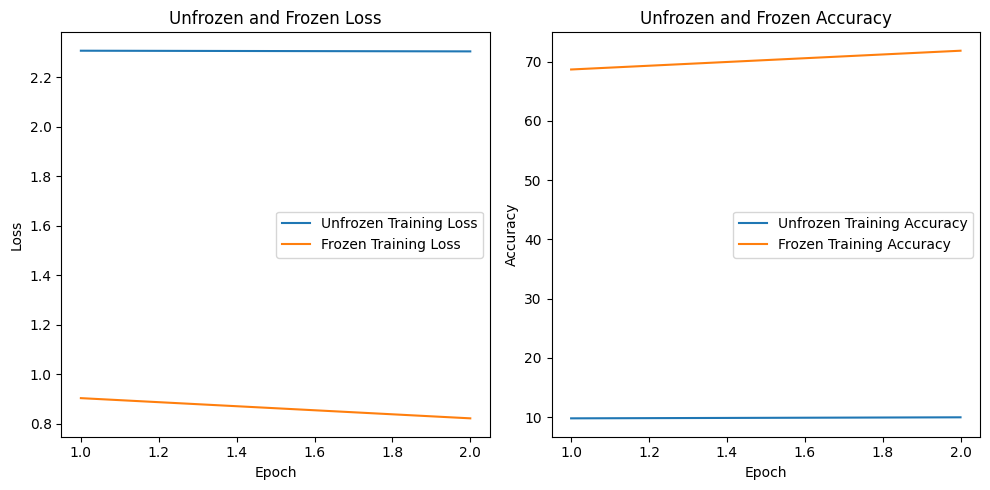

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses_unfrozen, label='Unfrozen Training Loss')
plt.plot(range(1, num_epochs + 1), train_losses_frozen, label='Frozen Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Unfrozen and Frozen Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies_unfrozen, label='Unfrozen Training Accuracy')
plt.plot(range(1, num_epochs + 1), train_accuracies_frozen, label='Frozen Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Unfrozen and Frozen Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The model having frozen base convolution blocks not only had better computation time, but also better model accuracy. From the graphs above, we can see that the downward trend of the frozen model's training loss does not indicate a state of overfitting as well.

In the span of 2 epochs, the model making use of frozen layers was able to achieve 76 percent accuracy while the raw model could only achieve 10! This example truly indicates the worth of transfer learning.

### Part II: Image Captioning using RNN [30 marks]



### Motivation

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H).

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here!

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``).

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects.

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset.

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment).

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [ ]:
# Load the feature map provided to you
features_map = torch.load('/content/drive/MyDrive/resnet50_caption.pt', map_location=device)

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [ ]:
import json
import pandas as pd

with open('/content/drive/MyDrive/COMP5625M_data_assessment_2/coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [ ]:
coco_subset = pd.read_csv("/content/drive/MyDrive/COMP5625M_data_assessment_2/coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [ ]:
def gen_clean_captions_df(df):

    # Remove spaces in the beginning and at the end
    # Convert to lower case
    # Replace all non-alphabet characters with space
    # Replace all continuous spaces with a single space
    clean_caption = df["caption"] \
        .str.strip() \
        .str.lower() \
        .replace(r"[^a-z ]+", "", regex=True) \
        .replace(r"[ ]+", " ", regex=True)

    # add to dataframe
    df["clean_caption"] = clean_caption

    return df

In [ ]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
#from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

import random
import math

In [ ]:
def split_ids(image_id_list, train=.7, valid=0.1, test=0.2):
    """
    Args:
        image_id_list (int list): list of unique image ids
        train (float): train split size (between 0 - 1)
        valid (float): valid split size (between 0 - 1)
        test (float): test split size (between 0 - 1)
    """
    list_copy = image_id_list.copy()
    random.shuffle(list_copy)

    train_size = math.floor(len(list_copy) * train)
    valid_size = math.floor(len(list_copy) * valid)

    return list_copy[:train_size], list_copy[train_size:(train_size + valid_size)], list_copy[(train_size + valid_size):]

In [ ]:
##### Spilt your training, validation and test dataset with indexes to each set
#from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [ ]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [ ]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [ ]:
MIN_FREQUENCY = 3
def build_vocab(df_ids, new_file, vocab):
    """
    Parses training set token file captions and builds a Vocabulary object and dataframe for
    the image and caption data

    Returns:
        vocab (Vocabulary): Vocabulary object containing all words appearing more than min_frequency
    """
    word_mapping = Counter()

    # for index in df.index:
    for index, id in enumerate(df_ids):
        caption = str(new_file.loc[new_file['image_id']==id]['clean_caption'])
        for word in caption.split():
            # also get rid of numbers, symbols etc.
            if word in word_mapping:
                word_mapping[word] += 1
            else:
                word_mapping[word] = 1



    # add the words to the vocabulary
    for word in word_mapping:
        # Ignore infrequent words to reduce the embedding size
        if word_mapping[word] > MIN_FREQUENCY:
            vocab.add_word(word)

    return vocab

In [ ]:
### build vocabulariy for each set - train, val and test
# you will be using to create dataloaders
#from helperDL import build_vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2341


In [ ]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2518

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn.


In [ ]:
class EncoderCNN(nn.Module):
    def __init__(self):
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(EncoderCNN, self).__init__()
        resnet = models.resnet50(pretrained=True)

        # TO COMPLETE
        # keep all layers of the pretrained net except the last one
        layers = list(resnet.children())[:-1]
        # unpack the layers and create a new Sequential
        self.resnet = nn.Sequential(*layers)

    def forward(self, images):
        """Extract feature vectors from input images."""
        with torch.no_grad():
            features = self.resnet(images)

        features = features.reshape(features.size(0), -1)
        return features

In [ ]:
#from helperDL import EncoderCNN
model = EncoderCNN()
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 159MB/s]


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [ ]:
# also load the model ckpt and udate the model state dict of the base model
# ---> your entry here (make sure that the path is correct)
#checkpoint = torch.load("/content/drive/MyDrive/Deep Learning/coco_subset_assessment_decoder.ckpt")
#model.load_state_dict(checkpoint['model_state_dict'])

In [ ]:
MAX_SEQ_LEN = 47
class COCO_Features(Dataset):
    """ COCO custom dataset with features and vocab, compatible with torch.utils.data.DataLoader. """

    def __init__(self, df, vocab, features, padded=False, max_len=MAX_SEQ_LEN):
        """ Set the path for images, captions and vocabulary wrapper.

        Args:
            df (str list): dataframe of image meta
            captions (str list): list of str captions
            vocab: vocabulary wrapper
            features: torch Tensor of extracted features
        """
        self.df = df
        self.vocab = vocab
        self.features = features

        self.padded = padded
        self.max_len = max_len

    def __getitem__(self, index):
        """ Returns one data pair (feature and target caption). """

        # path = IMAGE_DIR + str(self.df.iloc[index]['file_name'])

        entry = self.df.iloc[index]
        image_id = entry["file_name"]

        image_features = self.features[image_id]

        # convert caption (string) to word ids.
        tokens = self.df.iloc[index]['clean_caption'].split()
        caption = []

        # build the Tensor version of the caption, with token words
        caption.extend([self.vocab(token) for token in tokens])
        caption.append(self.vocab('<end>'))
        target = torch.Tensor(caption)

        return image_features, target.int()

    def __len__(self):
        return len(self.df)

In [ ]:
def caption_collate_fn(data):
    """ Creates mini-batch tensors from the list of tuples (image, caption).
    Args:
        data: list of tuple (image, caption).
            - image: torch tensor of shape (3, 224, 224).
            - caption: torch tensor of shape (?); variable length.
    Returns:
        images: torch tensor of shape (batch_size, 3, 224, 224).
        targets: torch tensor of shape (batch_size, padded_length).
        lengths: list; valid length for each padded caption.
    """
    # Sort a data list by caption length from longest to shortest.
    data.sort(key=lambda x: len(x[1]), reverse=True)
    images, captions = zip(*data)

    # merge images (from tuple of 3D tensor to 4D tensor).
    # if using features, 2D tensor to 3D tensor. (batch_size, 256)
    images = torch.stack(images, 0)

    # merge captions (from tuple of 1D tensor to 2D tensor).
    lengths = [len(cap) for cap in captions]
    # pad with zeros
    targets = torch.zeros(len(captions), max(lengths)).long()
    for i, cap in enumerate(captions):
        end = lengths[i]
        targets[i, :end] = cap[:end]
    return images, targets, lengths

In [ ]:
##### Preparing the train, val and test dataloaders
#from helperDL import COCO_Features
#from helperDL import caption_collate_fn


# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [ ]:
EMBED_SIZE = 256  # Adjusted embedding size
HIDDEN_SIZE = 512  # Adjusted hidden size
NUM_LAYERS = 1  # Adjusted number of layers
LR = 0.01  # Adjusted learning rate
NUM_EPOCHS = 5  # Adjusted number of epochs
LOG_STEP = 10  # Adjusted logging step
MAX_SEQ_LEN = 47  # Adjusted maximum sequence length


#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence


In [ ]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence as pack_pad_seq

class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):
        super(DecoderRNN, self).__init__()
        self.resize = nn.Linear(2048, embed_size)  # Resize feature vector
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        self.embed = nn.Embedding(vocab_size, embed_size)

        # GRU
        self.gru = nn.GRU(embed_size, hidden_size, num_layers, batch_first=True)

        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length

    def forward(self, features, captions, lengths):
        embeddings = self.embed(captions)
        im_features = self.resize(features)
        im_features = self.bn(im_features)
        embeddings = torch.cat((im_features.unsqueeze(1), embeddings), 1)
        packed = pack_pad_seq(embeddings, lengths, batch_first=True, enforce_sorted=False)
        hiddens, _ = self.gru(packed)
        outputs = self.linear(hiddens[0])  # Use hidden states to predict
        return outputs

    def sample(self, features, states=None):
        sampled_ids = []
        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.gru(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))   # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)               # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)
            inputs = inputs.unsqueeze(1)
        sampled_ids = torch.stack(sampled_ids, 1)       # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


In [ ]:
EMBED_SIZE = 256  # Adjusted embedding size
HIDDEN_SIZE = 512  # Adjusted hidden size
NUM_LAYERS = 1  # Adjusted number of layers
LR = 0.01  # Adjusted learning rate
NUM_EPOCHS = 5  # Adjusted number of epochs
LOG_STEP = 10  # Adjusted logging step
MAX_SEQ_LEN = 47  # Adjusted maximum sequence length

In [ ]:
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(decoder.parameters(), lr=LR)
vocab_size=len(vocab)

In [ ]:
# Assuming train_loader, valid_loader, NUM_EPOCHS, device, and LR are defined
# Initialize the model, loss, and optimizer
decoder = DecoderRNN(vocab_size=len(vocab))  # Make sure to define vocab_size
decoder = decoder.to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(decoder.parameters(), lr=LR)

# Initialize lists to keep track of losses
train_losses = []
valid_losses = []

NUM_EPOCHS = 20

# Training loop
for epoch in range(NUM_EPOCHS):
    decoder.train()
    total_train_loss = 0
    for i, (features_, captions_, lengths_) in enumerate(train_loader):
        features_ = features_.to(device)
        captions_ = captions_.to(device)
        targets = pack_padded_sequence(captions_, lengths_, batch_first=True, enforce_sorted=False)[0]

        optimizer.zero_grad()
        outputs = decoder(features_, captions_, lengths_)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Print training progress
        if i % 100 == 0:
            print(f"Epoch {epoch+1}, Batch {i+1}/{len(train_loader)}, Train Loss: {loss.item():.4f}")

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation loop
    decoder.eval()
    total_valid_loss = 0
    with torch.no_grad():
        for i, (features_, captions_, lengths_) in enumerate(valid_loader):
            features_ = features_.to(device)
            captions_ = captions_.to(device)
            targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]

            outputs = decoder(features_, captions_, lengths_)
            loss = criterion(outputs, targets)
            total_valid_loss += loss.item()

            # Print validation progress
            if i % 50 == 0:
                print(f"Epoch {epoch+1}, Validation Batch {i+1}/{len(valid_loader)}, Valid Loss: {loss.item():.4f}")

    avg_valid_loss = total_valid_loss / len(valid_loader)
    valid_losses.append(avg_valid_loss)

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Valid Loss = {avg_valid_loss:.4f}")


Epoch 1, Batch 1/555, Train Loss: 7.8414
Epoch 1, Batch 101/555, Train Loss: 3.6060
Epoch 1, Batch 201/555, Train Loss: 3.4571
Epoch 1, Batch 301/555, Train Loss: 3.3346
Epoch 1, Batch 401/555, Train Loss: 3.4205
Epoch 1, Batch 501/555, Train Loss: 3.3113
Epoch 1, Validation Batch 1/80, Valid Loss: 5.8476
Epoch 1, Validation Batch 51/80, Valid Loss: 5.5418
Epoch 1: Train Loss = 3.5358, Valid Loss = 4.7846
Epoch 2, Batch 1/555, Train Loss: 2.6649
Epoch 2, Batch 101/555, Train Loss: 2.8305
Epoch 2, Batch 201/555, Train Loss: 2.7626
Epoch 2, Batch 301/555, Train Loss: 2.8038
Epoch 2, Batch 401/555, Train Loss: 2.8821
Epoch 2, Batch 501/555, Train Loss: 2.8589
Epoch 2, Validation Batch 1/80, Valid Loss: 5.4568
Epoch 2, Validation Batch 51/80, Valid Loss: 3.5078
Epoch 2: Train Loss = 2.9191, Valid Loss = 4.8757
Epoch 3, Batch 1/555, Train Loss: 2.4713
Epoch 3, Batch 101/555, Train Loss: 2.5555
Epoch 3, Batch 201/555, Train Loss: 2.6897
Epoch 3, Batch 301/555, Train Loss: 3.0052
Epoch 3, Bat

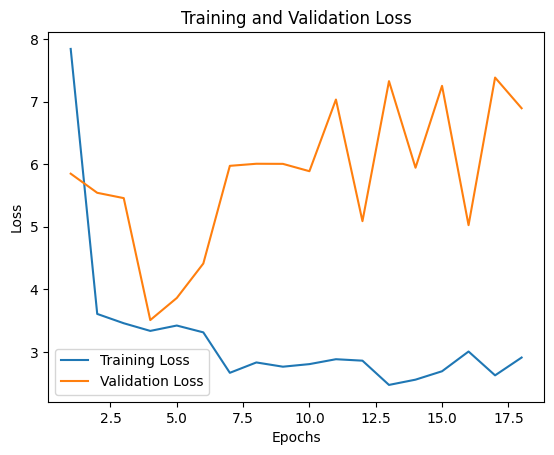

In [ ]:
import matplotlib.pyplot as plt



# Data
train_losses = [7.8414, 3.6060, 3.4571, 3.3346, 3.4205, 3.3113, 2.6649, 2.8305, 2.7626, 2.8038, 2.8821, 2.8589, 2.4713, 2.5555, 2.6897, 3.0052, 2.6243, 2.9090]
val_losses = [5.8476, 5.5418, 5.4568, 3.5078, 3.8609, 4.4116, 5.9727, 6.0060, 6.0044, 5.8870, 7.0324, 5.0885, 7.3264, 5.9427, 7.2510, 5.0245, 7.3837, 6.8933]

epochs = range(1, len(train_losses) + 1)

# Plot
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()




In [ ]:
# save model after training
decoder_ckpt = torch.save(decoder, "/content/drive/MyDrive/Deep Learning/coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks]

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])

dataset_test = COCOImagesDataset(
    df=test_set,
    transform=data_transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0)

In [ ]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

In [ ]:
# getting functions from helperDL.py
#from helperDL import timshow
#from helperDL import decode_caption

In [ ]:
def decode_caption(sampled_ids, vocab):
    """
    Args:
        ref_captions (str list): ground truth captions
        sampled_ids (int list): list of word IDs from decoder
    """
    # Convert word_ids to words
    sampled_caption = []
    for word_id in sampled_ids:
        word = vocab.idx2word[word_id]
        if word != '<start>':
            if word == '<end>':
                break

        sampled_caption.append(word)

    sentence = ' '.join(sampled_caption)
    return sentence


def timshow(x):
    x = (x-x.min())/(x.max()-x.min())
    x = x.detach().clamp_(min=0, max=1).mul(255).type(torch.uint8)
    xa = np.transpose(x.numpy(),(1,2,0))
    plt.imshow(xa)
    plt.axis('off')
    plt.show()
    return xa

In [ ]:
IMAGES_TO_SHOW = 4
idx = 0
with torch.no_grad():
    for i, (image,filename) in enumerate(test_loader):

        # your code here --->








        print(f"GENERATED: \n")
        print("REFERENCES:")

        print("===================================\n")


        timshow(image[0].cpu())
        idx +=1
        if idx == IMAGES_TO_SHOW:
            break

#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions:

* Find the embedding vector of each word in the caption
* Compute the average vector for each caption
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores

Calculate the cosine similarity using the model's predictions over the whole test set.

Display a histogram of the distribution of scores over the test set.

In [ ]:
# your code here

##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.